<table align="left">
  <td>
    <a href="https://colab.research.google.com/github/marco-canas/Machine-Learning/blob/main/ML/classes/class_march_3/class_march_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>
  </td>
</table>

# Construir un clasificador binario ceros versus unos utilizando el dataset `mnist_784`

## [Primer video de apoyo](https://www.youtube.com/watch?v=dJqt0va_9Zs)

**Nombre estudiante:** Mosquera Perea

## Modelo

* LinearRegression  

Para ello siga la metodología dada por Aurelien Géron:

1. Obtener el dataset y configurarlo en la forma estándar $[X \mid y]$. Donde los valores de las entradas de estas matrices sea de tipo `int64`.  

2. Descomponer a `X` y a `y` en `X_train_0_vs_1`, `X_test_0_vs_1`, `y_train_0_vs_1` y `y_test_0_vs_1` con una tasa de testeo del 20%. Y verificar con histogramas que el muestreo sea estratificado. 

3. Escale los atributos con la estrategia de estandarización. 

4. Entrene el modelo asignados con los datos escalados `X_train_0_vs_1_escalado` y las etiquetas de entrenamiento `y_train_0_vs_1`

5. ¿Es aplicable la medida de desempeño `accuracy` para su tarea de clasificación? Justifique su respuesta. 

6. Efectue el proceso de validación cruzada con 5 hojas de validación (`cv = 5`) y con el `scoring = `accuracy`.   

7. Determine la matriz de confusión utilizando 5 hojas de validación.  

8. Determine la precisión y el recall de su clasificador para las mismas 5 hojas de validación.  

9. Determine el puntaje f1 de su clasificador para las mismas 5 hojas de validación. 

10. Utilice el `method="decision_function"` de la función `cross_val_predict()` para determinar el vector `y_train_0_vs_1_scores` de los puntajes de decisión para los modelos lineales que le hayan asignado. 

11. Utilice `precision_recall_curve` para determinar el umbral de decisión necesario para obtener una precisión del 90 $\%$ en su clasificador. 

12. Utilice la función `roc_curve` del módulo `metrics` de sklearn para trazar la curva ROC de su modelo. Para ello evalue la función `roc_curve` en `y_train_0_vs_1`, y  `y_train_0_vs_1_scores`).

13. Determine el área bajo la curva ROC utilizando la función `roc_auc_score` del módulo metrics de Sklearn. 

# Metodología dada por Aurelien Géron para Clasificadores binarios:

1. Obtener el dataset y configurarlo en la forma estándar $[X \mid y]$. Donde los valores de las entradas de estas matrices sea de tipo `int64`.  

In [1]:
from sklearn.datasets import fetch_openml

In [2]:
%%time 

mnist = fetch_openml('mnist_784', version = 1, as_frame = False) 

Wall time: 45.5 s


In [3]:
mnist.keys() 

dict_keys(['data', 'target', 'frame', 'categories', 'feature_names', 'target_names', 'DESCR', 'details', 'url'])

In [4]:
X,y = mnist['data'], mnist['target'] 

In [5]:
type(X)


numpy.ndarray

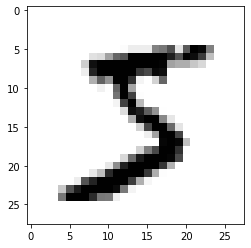

In [6]:
import matplotlib.pyplot as plt

plt.imshow(X[0,:].reshape(28,28), cmap = 'binary')

In [7]:
y[0]

'5'

In [8]:
import numpy as np 
y = y.astype(np.int64)

In [9]:
y[0]

5

2. Descomponer a `X` y a `y` en `X_train_0_vs_1`, `X_test_0_vs_1`, `y_train_0_vs_1` y `y_test_0_vs_1` con una tasa de testeo del 20%. Y verificar con histogramas que el muestreo sea estratificado. 

In [16]:
X_0 = X[y==0]
y_0 = y[y==0]

In [20]:
y_0 = y_0.reshape(-1,1)

In [17]:
X_1 = X[y==1]
y_1 = y[y==1]

In [21]:
y_1 = y_1.reshape(-1,1)

In [22]:
X_0_vs_1 = np.vstack((X_0, X_1)) 
y_0_vs_1 = np.vstack((y_0, y_1)) 

In [ ]:
X_0

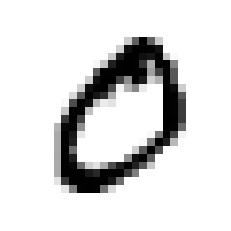

In [102]:
import matplotlib.pyplot as plt

plt.imshow(X_0[0,:].reshape(28,28), cmap = 'binary')

plt.savefig('cero.jpg')
plt.axis('off')
plt.show() 

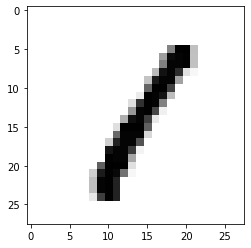

In [15]:
import matplotlib.pyplot as plt

plt.imshow(X_1[0,:].reshape(28,28), cmap = 'binary')

In [23]:
y_0[0]

array([0], dtype=int64)

In [24]:
y_1[0]

array([1], dtype=int64)

`[X_0_vs_1 | y_0_vs_1]`

In [27]:
from sklearn.model_selection import StratifiedShuffleSplit

In [74]:
sss = StratifiedShuffleSplit(n_splits = 1, random_state = 42, test_size = 0.2) 

In [75]:
for train_index, test_index in sss.split(X_0_vs_1, y_0_vs_1):
    X_0_vs_1_train, X_0_vs_1_test = X_0_vs_1[train_index], \
                                                  X_0_vs_1[test_index] 
    y_0_vs_1_train, y_0_vs_1_test = y_0_vs_1[train_index], \
                                                  y_0_vs_1[test_index] 

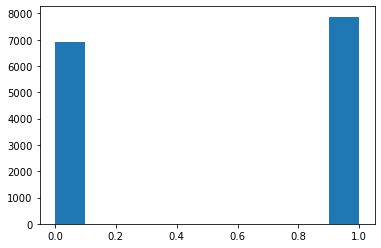

In [103]:
plt.hist(y_0_vs_1)

plt.show() 

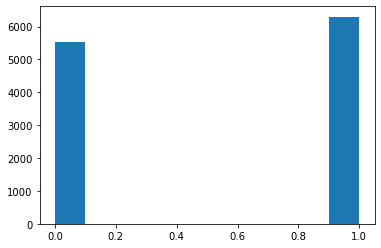

In [104]:
plt.hist(y_0_vs_1_train)

plt.show() 

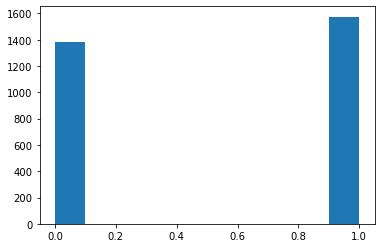

In [78]:
plt.hist(y_0_vs_1_test)
plt.show() 

3. Escale los atributos con la estrategia de estandarización. 

In [79]:
from sklearn.preprocessing import StandardScaler 

In [80]:
escalador = StandardScaler() 

In [81]:
X_0_vs_1_train_escalado = escalador.fit_transform(X_0_vs_1_train)

In [82]:
X_0_vs_1_test_escalado = escalador.transform(X_0_vs_1_test)

4. Entrene el modelo asignados con los datos escalados `X_train_0_vs_1_escalado` y las etiquetas de entrenamiento `y_train_0_vs_1`

In [83]:
from sklearn.linear_model import LogisticRegression

In [84]:
lr_clf = LogisticRegression(max_iter = 500)

In [85]:
lr_clf.fit(X_0_vs_1_train, y_0_vs_1_train.ravel())

LogisticRegression(max_iter=500)

5. ¿Es aplicable la medida de desempeño `accuracy` para su tarea de clasificación? Justifique su respuesta. 

Cómo la clase del 0 se presenta en 7000 veces y la clase del 1 se presenta 8 mil veces, entonces tenemos dos clase con sesgo, lo no recomienda el uso de la medida de exactitud o accjuracy para la medida de desempeño de nuestro clasificador. 

6. Efectue el proceso de validación cruzada con 5 hojas de validación (`cv = 5`) y con el `scoring = `accuracy`.   

In [86]:
from sklearn.model_selection import cross_val_score

In [87]:
primer_imagen = escalador.transform([X_0_vs_1_train[0]])

In [88]:
lr_clf.predict(primer_imagen)

array([0], dtype=int64)

In [90]:
scores = cross_val_score(lr_clf, X_0_vs_1_train, y_0_vs_1_train.ravel(), \
                        cv = 5, scoring = 'accuracy')

In [91]:
scores

array([0.9987315 , 0.99788584, 0.9987315 , 0.99788584, 0.99915398])

7. Determine la matriz de confusión utilizando 5 hojas de validación.  

In [92]:
from sklearn.model_selection import cross_val_predict 

In [93]:
y_0_vs_1_train_predicciones = cross_val_predict(lr_clf, \
                                X_0_vs_1_train, y_0_vs_1_train.ravel(), \
                        cv = 5) 

In [94]:
from sklearn.metrics import confusion_matrix 

In [95]:
confusion_matrix(y_0_vs_1_train, y_0_vs_1_train_predicciones) 

array([[5514,    8],
       [  10, 6292]], dtype=int64)

8. Determine la precisión y el recall de su clasificador para las mismas 5 hojas de validación.  

In [99]:
from sklearn.metrics import precision_score, recall_score, f1_score 

In [97]:
precision_score(y_0_vs_1_train, y_0_vs_1_train_predicciones) 

0.9987301587301587

In [98]:
recall_score(y_0_vs_1_train, y_0_vs_1_train_predicciones) 

0.9984132021580451

9. Determine el puntaje f1 de su clasificador para las mismas 5 hojas de validación. 

In [100]:
f1_score(y_0_vs_1_train, y_0_vs_1_train_predicciones) 

0.9985716552928108

10. Utilice el `method="decision_function"` de la función `cross_val_predict()` para determinar el vector `y_train_0_vs_1_scores` de los puntajes de decisión para el modelo LogisticRegression asignado. 

In [105]:
%%time 
y_0_vs_1__train_puntajes_decision = cross_val_predict(lr_clf, \
                                X_0_vs_1_train, y_0_vs_1_train.ravel(), \
                        cv = 5, method = 'decision_function')  

Wall time: 9.27 s


In [106]:
y_0_vs_1__train_puntajes_decision

array([-25.95746711,  26.25815625,  24.48759549, ...,  48.81688785,
        33.19533756,  26.67058107])

11. Utilice `precision_recall_curve` para determinar el umbral de decisión necesario para obtener una precisión del 90 $\%$ en su clasificador. 

In [107]:
from sklearn.metrics import precision_recall_curve 

In [109]:
precisions, recalls, thresholds =  precision_recall_curve(\
                                                    y_0_vs_1_train, \
                                        y_0_vs_1__train_puntajes_decision)  

In [111]:
len(precisions),len(recalls), len( thresholds) 

(6541, 6541, 6540)

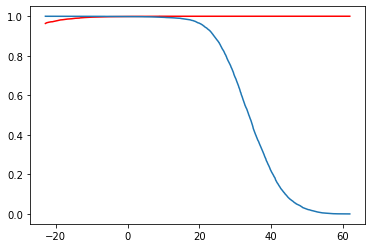

In [113]:
plt.plot(thresholds, precisions[:-1], color = 'red' )
plt.plot(thresholds, recalls[:-1] )

12. Utilice la función `roc_curve` del módulo `metrics` de sklearn para trazar la curva ROC de su modelo. Para ello evalue la función `roc_curve` en `y_train_0_vs_1`, y  `y_train_0_vs_1_scores`).

In [114]:
from sklearn.metrics import roc_curve


In [117]:
fpr, tpr, thresholds = roc_curve(y_0_vs_1_train,\
                                 y_0_vs_1__train_puntajes_decision)

In [118]:
len(fpr), len(tpr), len(thresholds)

(32, 32, 32)

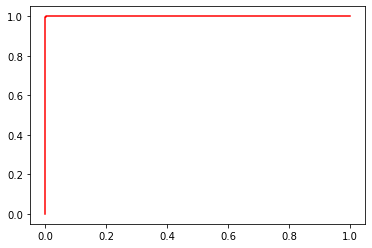

In [120]:
plt.plot( fpr, tpr, color = 'red' )


13. Determine el área bajo la curva ROC utilizando la función `roc_auc_score` del módulo metrics de Sklearn. 

In [121]:
from sklearn.metrics import roc_auc_score 

In [122]:
roc_auc_score(y_0_vs_1_train, y_0_vs_1__train_puntajes_decision)

0.9999805170420709

**Conclusión:** Este modelo se comporta muy muy bien en el reconocimiento de ceros y unos. 

Nos resta el verificar su comportamiento den el conjunto de testeo